In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from __future__ import division
pd.set_option('display.width',5000)

from patsy import dmatrices

from sklearn import linear_model as lm
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation
from sklearn import metrics
from sklearn.metrics import confusion_matrix

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data = 'phishing_data.csv'
df = pd.read_csv(data)
df.head(1)

,index,having_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1


In [3]:
df.columns

Index(['index', 'having_IP_Address', 'URLURL_Length', 'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page', 'Statistical_report', 'Result'], dtype='object')

In [4]:
a = '''
'having_IPhaving_IP_Address', 'URLURL_Length', 'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page', 'Statistical_report'
'''

In [5]:
a.replace('\', \'' ,  '+')

"\n'having_IPhaving_IP_Address+URLURL_Length+Shortining_Service+having_At_Symbol+double_slash_redirecting+Prefix_Suffix+having_Sub_Domain+SSLfinal_State+Domain_registeration_length+Favicon+port+HTTPS_token+Request_URL+URL_of_Anchor+Links_in_tags+SFH+Submitting_to_email+Abnormal_URL+Redirect+on_mouseover+RightClick+popUpWidnow+Iframe+age_of_domain+DNSRecord+web_traffic+Page_Rank+Google_Index+Links_pointing_to_page+Statistical_report'\n"

In [6]:
y,X=dmatrices('Result~ having_IPhaving_IP_Address+URLURL_Length+Shortining_Service+having_At_Symbol+double_slash_redirecting+Prefix_Suffix+having_Sub_Domain+SSLfinal_State+Domain_registeration_length+Favicon+port+HTTPS_token+Request_URL+URL_of_Anchor+Links_in_tags+SFH+Submitting_to_email+Abnormal_URL+Redirect+on_mouseover+RightClick+popUpWidnow+Iframe+age_of_domain+DNSRecord+web_traffic+Page_Rank+Google_Index+Links_pointing_to_page+Statistical_report', data=df, return_type='dataframe')

PatsyError: Error evaluating factor: NameError: name 'having_IPhaving_IP_Address' is not defined
    Result~ having_IPhaving_IP_Address+URLURL_Length+Shortining_Service+having_At_Symbol+double_slash_redirecting+Prefix_Suffix+having_Sub_Domain+SSLfinal_State+Domain_registeration_length+Favicon+port+HTTPS_token+Request_URL+URL_of_Anchor+Links_in_tags+SFH+Submitting_to_email+Abnormal_URL+Redirect+on_mouseover+RightClick+popUpWidnow+Iframe+age_of_domain+DNSRecord+web_traffic+Page_Rank+Google_Index+Links_pointing_to_page+Statistical_report
            ^^^^^^^^^^^^^^^^^^^^^^^^^^

In [7]:
#Generate a confusion matrix plot
def plot_confusion_matrix(cm,title='Confusion matrix', cmap=plt.cm.Reds):
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('Truth')
    plt.xlabel('Predicted')
    
def train_score(classifier,x,y):
    xtrain, xtest, ytrain, ytest = cross_validation.train_test_split(x, y, test_size=0.2, random_state=0)
    ytrain=np.ravel(ytrain)
    clf = classifier.fit(xtrain, ytrain)
    # accuracy for test & train:
    train_acc=clf.score(xtrain, ytrain)
    test_acc=clf.score(xtest,ytest)
    print("Training Data Accuracy: %0.2f" %(train_acc))
    print("Test Data Accuracy:     %0.2f" %(test_acc))
    
    y_true = ytest
    y_pred = clf.predict(xtest)


    conf = confusion_matrix(y_true, y_pred)
    print(conf)

    print ('\n')
    print ("Precision:              %0.2f" %(conf[0, 0] / (conf[0, 0] + conf[1, 0])))
    print ("Recall:                 %0.2f"% (conf[0, 0] / (conf[0, 0] + conf[0, 1])))
    print ("Recall:                 %0.2f"% (conf[0, 0] / (conf[0, 0] + conf[0, 1])))
    print ("Recall:                 %0.2f"% (conf[0, 0] / (conf[0, 0] + conf[0, 1])))
    
    cm=confusion_matrix(y_true, y_pred, labels=None)
    
    plt.figure()
    plot_confusion_matrix(cm)

Training Data Accuracy: 0.93
Test Data Accuracy:     0.92
[[ 906  108]
 [  75 1122]]


Precision:              0.92
Recall:                 0.89


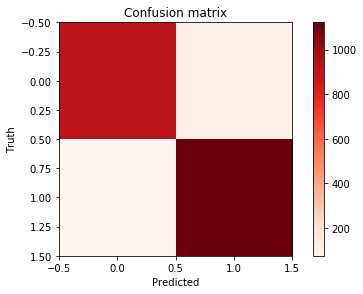

In [59]:
log_clf=LogisticRegression()
train_score(log_clf,X,y)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a175837b8>]], dtype=object)

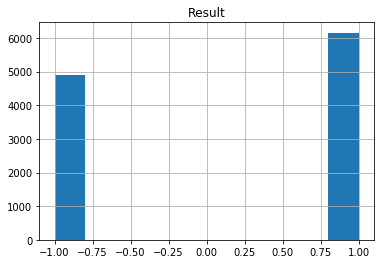

In [30]:
#Result
df.hist('Result')

Text(0,0.5,'TPR')

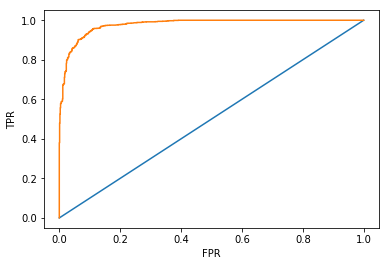

In [67]:
from sklearn.metrics import roc_curve, auc

xtrain, xtest, ytrain, ytest = cross_validation.train_test_split(X, y, test_size=0.2, random_state=1234)
log = LogisticRegression()
log.fit(xtrain,np.ravel(ytrain))
y_score=log.predict_proba(xtest)[:,-1]

fpr, tpr, thresh = roc_curve(ytest, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [92]:
np.where(tpr==1.0)

(array([541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553,
        554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566,
        567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579,
        580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592,
        593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605,
        606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618,
        619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631,
        632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644]),)

In [90]:
np.where(tpr >= 0.99)

(array([504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516,
        517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529,
        530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542,
        543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555,
        556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568,
        569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581,
        582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594,
        595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607,
        608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620,
        621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633,
        634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644]),)

In [74]:
np.where(thresh == 0.99999971543292865)

(array([0]),)

In [83]:
np.where(thresh >= 0.98)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168])

In [98]:
fpr_select=[]
for i in np.where(tpr >= 0.97):
    fpr_select.append(fpr[i])
fpr_select

[array([ 0.14136126,  0.14554974,  0.14554974,  0.14973822,  0.14973822,
         0.15078534,  0.15078534,  0.15287958,  0.1539267 ,  0.15811518,
         0.15811518,  0.16649215,  0.16649215,  0.16753927,  0.16963351,
         0.17905759,  0.18115183,  0.18534031,  0.18638743,  0.19162304,
         0.19162304,  0.19371728,  0.19371728,  0.19581152,  0.2       ,
         0.2       ,  0.20418848,  0.20628272,  0.20628272,  0.20942408,
         0.20942408,  0.21780105,  0.21780105,  0.21989529,  0.22094241,
         0.22094241,  0.22094241,  0.22617801,  0.22617801,  0.23664921,
         0.23664921,  0.24293194,  0.24502618,  0.2460733 ,  0.24921466,
         0.25235602,  0.25235602,  0.25445026,  0.2565445 ,  0.2565445 ,
         0.25968586,  0.2617801 ,  0.27015707,  0.27015707,  0.27329843,
         0.27329843,  0.27434555,  0.27434555,  0.28586387,  0.28586387,
         0.28795812,  0.29109948,  0.29947644,  0.30157068,  0.30471204,
         0.30680628,  0.31099476,  0.31413613,  0.3

In [75]:
thresh

array([  9.99999715e-01,   9.99997370e-01,   9.99997271e-01,
         9.99995946e-01,   9.99995916e-01,   9.99995088e-01,
         9.99994672e-01,   9.99994062e-01,   9.99993650e-01,
         9.99993295e-01,   9.99992771e-01,   9.99991542e-01,
         9.99990998e-01,   9.99990264e-01,   9.99989888e-01,
         9.99989355e-01,   9.99989191e-01,   9.99984153e-01,
         9.99981430e-01,   9.99980059e-01,   9.99979733e-01,
         9.99978526e-01,   9.99978521e-01,   9.99978351e-01,
         9.99977293e-01,   9.99977007e-01,   9.99976957e-01,
         9.99971382e-01,   9.99969963e-01,   9.99960392e-01,
         9.99960128e-01,   9.99951080e-01,   9.99950372e-01,
         9.99946695e-01,   9.99945549e-01,   9.99914165e-01,
         9.99910476e-01,   9.99909877e-01,   9.99907698e-01,
         9.99867920e-01,   9.99866134e-01,   9.99845935e-01,
         9.99840463e-01,   9.99817023e-01,   9.99811061e-01,
         9.99807112e-01,   9.99803078e-01,   9.99794652e-01,
         9.99775034e-01,